In [1]:
import pandas as pd

In [6]:
import cv2
import pandas as pd
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load the CSV
df = pd.read_csv('/Users/aarohiverma/Documents/ai_vs_real/train.csv')

# Lists to store PSNR and SSIM results
psnr_values = []
ssim_values = []

# Compute PSNR and SSIM for each image
for index, row in df.iterrows():
    image_path = row['file_name']

    # Load the image
    image = cv2.imread(image_path)
    
    # Skip if image loading fails
    if image is None:
        print(f"Image not found: {image_path}")
        psnr_values.append(None)
        ssim_values.append(None)
        continue

    # Convert to grayscale for SSIM computation
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Self-comparison to compute PSNR and SSIM as reference
    psnr_value = psnr(image, image)
    ssim_value = ssim(gray_image, gray_image)

    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

# Add results back to the DataFrame
df['PSNR'] = psnr_values
df['SSIM'] = ssim_values



/Users/aarohiverma/Library/Python/3.9/lib/python/site-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


In [7]:
df.head(20)

,Unnamed: 0,file_name,label,PSNR,SSIM
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,inf,1.0
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,inf,1.0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,inf,1.0
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,inf,1.0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,inf,1.0
5,5,train_data/25ea852f30594bc5915eb929682af429.jpg,0,inf,1.0
6,6,train_data/e67085fb6d814cbabe08f978c738f3f7.jpg,1,inf,1.0
7,7,train_data/041c36d9269146cdb88e7526e3b91651.jpg,0,inf,1.0
8,8,train_data/4aea3b876247467c8d3713d4920148ab.jpg,1,inf,1.0
9,9,train_data/09708379751e44d0bc908d8652d0db3e.jpg,0,inf,1.0


In [8]:
df.to_csv('output_with_psnr_ssim.csv', index=False)

In [11]:
import cv2
import pandas as pd
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load the CSV file
df = pd.read_csv('/Users/aarohiverma/Documents/ai_vs_real/train.csv')

psnr_values = [None] * len(df)
ssim_values = [None] * len(df)

# Iterate in pairs (0 & 1, 2 & 3, etc.)
for i in range(0, len(df) - 1, 2):
    path1 = df.loc[i, 'file_name']
    path2 = df.loc[i + 1, 'file_name']

    # Load both images
    img1 = cv2.imread(path1)
    img2 = cv2.imread(path2)

    if img1 is None or img2 is None:
        print(f"Image missing: {path1} or {path2}")
        continue

    # Ensure dimensions match
    if img1.shape != img2.shape:
        print(f"Size mismatch: {path1} and {path2}")
        continue

    # Convert to grayscale for SSIM
    gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute PSNR and SSIM
    psnr_value = psnr(img1, img2)
    ssim_value = ssim(gray_img1, gray_img2)

    # Store results for both indices
    psnr_values[i] = psnr_value
    psnr_values[i + 1] = psnr_value
    ssim_values[i] = ssim_value
    ssim_values[i + 1] = ssim_value

# Save results to the DataFrame
df['PSNR'] = psnr_values
df['SSIM'] = ssim_values

# Save the results
df.to_csv('output_even_odd_comparisons.csv', index=False)
print("Results saved to output_even_odd_comparisons.csv")


Results saved to output_even_odd_comparisons.csv


In [10]:
df.head()

,Unnamed: 0,file_name,label
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1


In [13]:
import cv2
import numpy as np


# Function to calculate mean and standard deviation for color images (BGR channels)
def calculate_mean_std_color(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the mean and standard deviation for each channel (Blue, Green, Red)
    mean, std_dev = cv2.meanStdDev(image)

    # Return the values for each channel
    return mean.flatten(), std_dev.flatten()

# Initialize lists to store results
mean_values = []
std_dev_values = []

# Loop through each image file in the dataframe
for index, row in df.iterrows():
    image_path = row['file_name']  # Get the image file path
    mean, std_dev = calculate_mean_std_color(image_path)  # Calculate mean and std

    # Append the values to the lists
    mean_values.append(mean)
    std_dev_values.append(std_dev)

# Add the results as new columns to your dataframe
df[['Mean_B', 'Mean_G', 'Mean_R']] = pd.DataFrame(mean_values)
df[['StdDev_B', 'StdDev_G', 'StdDev_R']] = pd.DataFrame(std_dev_values)

# Save the updated dataframe with the mean and std values to a new CSV
df.to_csv('output_with_mean_std.csv', index=False)

# Example of viewing the result
df.head()


,Unnamed: 0,file_name,label,PSNR,SSIM,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,7.948439,0.234759,168.845655,186.656980,194.473272,77.567902,67.430139,64.705886
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,7.948439,0.234759,111.243589,145.096369,153.789785,90.156627,67.360708,69.114854
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,10.849806,0.672731,175.279973,181.654854,192.846842,70.549474,62.274128,56.683325
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,10.849806,0.672731,189.784330,196.318415,204.514516,48.250076,42.010944,31.837350
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,7.629244,0.128182,154.871198,169.775800,171.675351,82.529896,74.448978,71.998140


In [14]:
df.head()

,Unnamed: 0,file_name,label,PSNR,SSIM,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,7.948439,0.234759,168.845655,186.656980,194.473272,77.567902,67.430139,64.705886
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,7.948439,0.234759,111.243589,145.096369,153.789785,90.156627,67.360708,69.114854
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,10.849806,0.672731,175.279973,181.654854,192.846842,70.549474,62.274128,56.683325
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,10.849806,0.672731,189.784330,196.318415,204.514516,48.250076,42.010944,31.837350
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,7.629244,0.128182,154.871198,169.775800,171.675351,82.529896,74.448978,71.998140


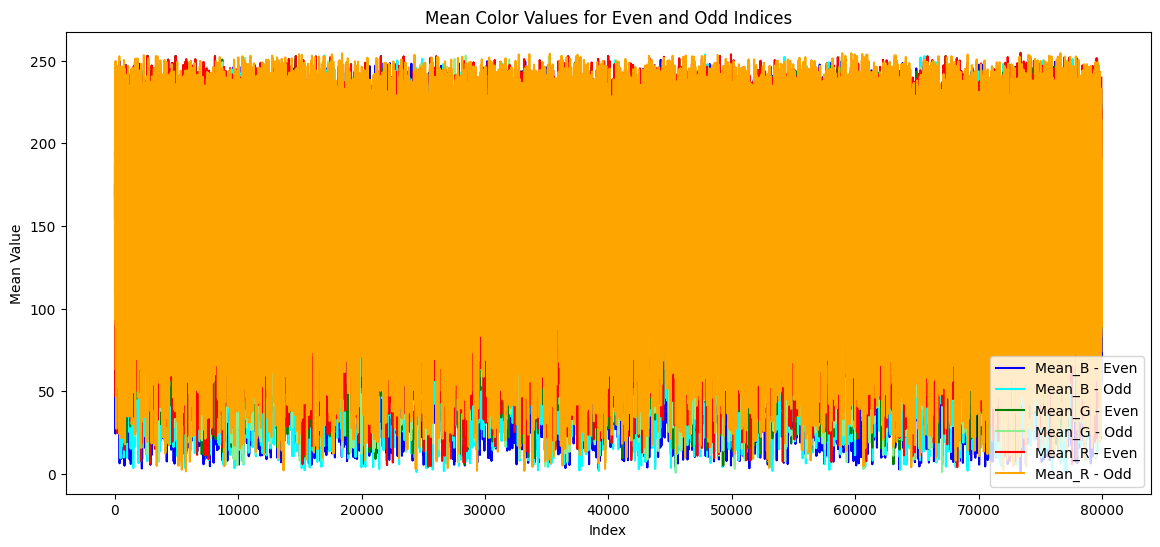

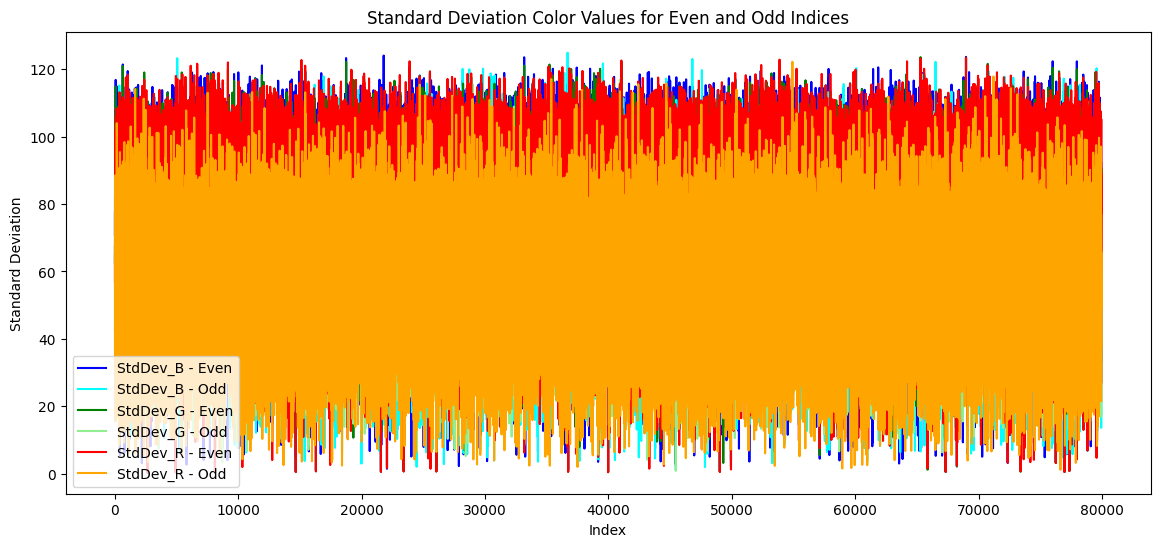

In [18]:
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv('output_with_mean_std.csv')  # Replace with your file path

# Select columns for visualization
columns = ['Mean_B', 'Mean_G', 'Mean_R', 'StdDev_B', 'StdDev_G', 'StdDev_R']

# Separate even and odd indices
even_indices = df.index[df.index % 2 == 0]
odd_indices = df.index[df.index % 2 != 0]

# Plot Mean color channels
plt.figure(figsize=(14, 6))
plt.plot(even_indices, df.loc[even_indices, 'Mean_B'], label='Mean_B - Even', color='blue')
plt.plot(odd_indices, df.loc[odd_indices, 'Mean_B'], label='Mean_B - Odd', color='cyan')
plt.plot(even_indices, df.loc[even_indices, 'Mean_G'], label='Mean_G - Even', color='green')
plt.plot(odd_indices, df.loc[odd_indices, 'Mean_G'], label='Mean_G - Odd', color='lightgreen')
plt.plot(even_indices, df.loc[even_indices, 'Mean_R'], label='Mean_R - Even', color='red')
plt.plot(odd_indices, df.loc[odd_indices, 'Mean_R'], label='Mean_R - Odd', color='orange')
plt.title('Mean Color Values for Even and Odd Indices')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# Plot StdDev color channels
plt.figure(figsize=(14, 6))
plt.plot(even_indices, df.loc[even_indices, 'StdDev_B'], label='StdDev_B - Even', color='blue')
plt.plot(odd_indices, df.loc[odd_indices, 'StdDev_B'], label='StdDev_B - Odd', color='cyan')
plt.plot(even_indices, df.loc[even_indices, 'StdDev_G'], label='StdDev_G - Even', color='green')
plt.plot(odd_indices, df.loc[odd_indices, 'StdDev_G'], label='StdDev_G - Odd', color='lightgreen')
plt.plot(even_indices, df.loc[even_indices, 'StdDev_R'], label='StdDev_R - Even', color='red')
plt.plot(odd_indices, df.loc[odd_indices, 'StdDev_R'], label='StdDev_R - Odd', color='orange')
plt.title('Standard Deviation Color Values for Even and Odd Indices')
plt.xlabel('Index')
plt.ylabel('Standard Deviation')
plt.legend()
plt.show()


In [16]:
!pip3 install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 17.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 41.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/Users/aarohiverma/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


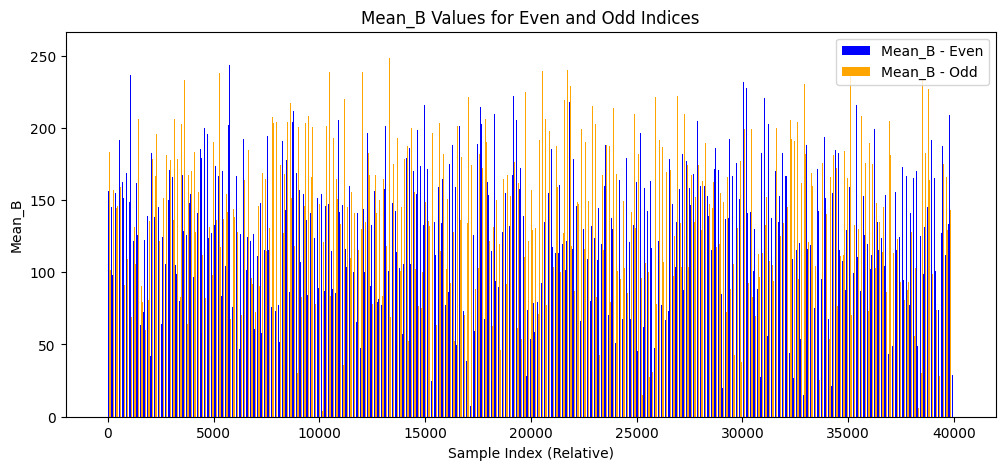

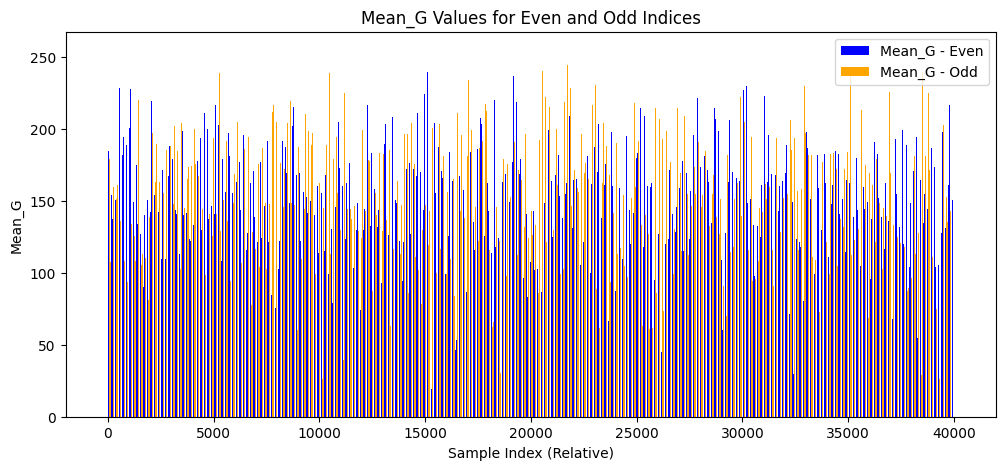

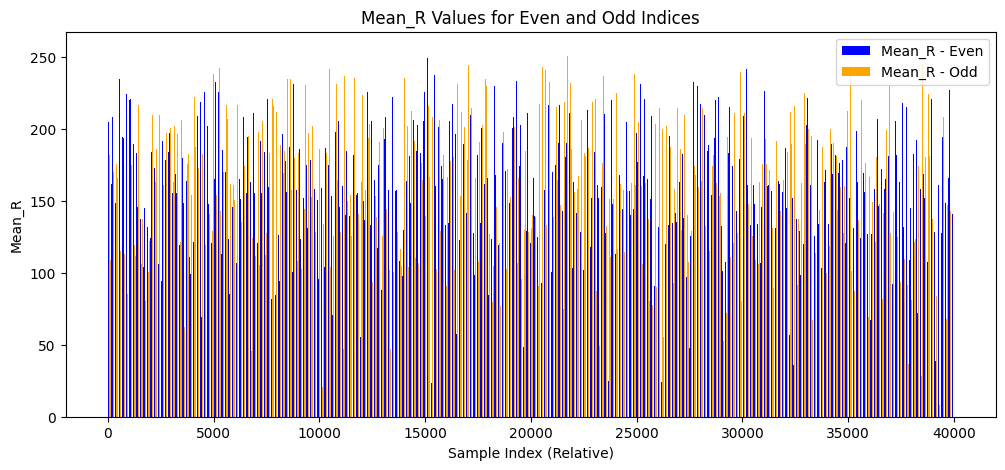

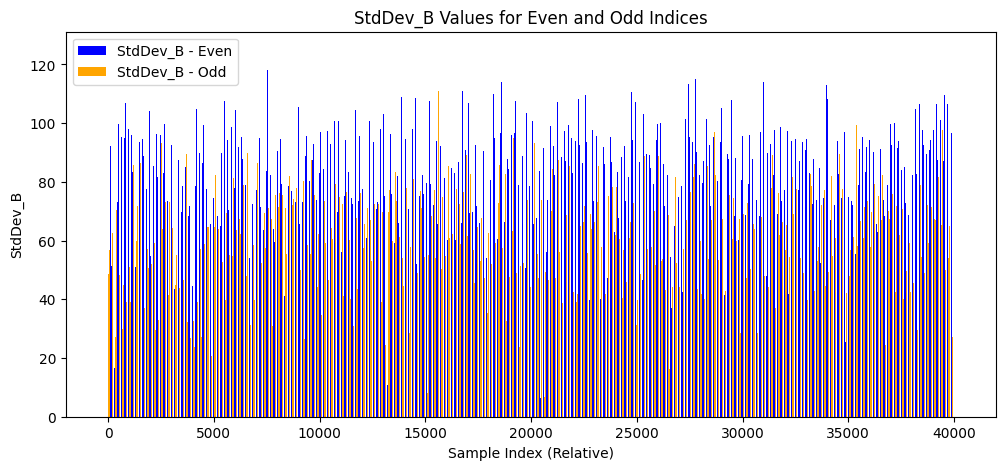

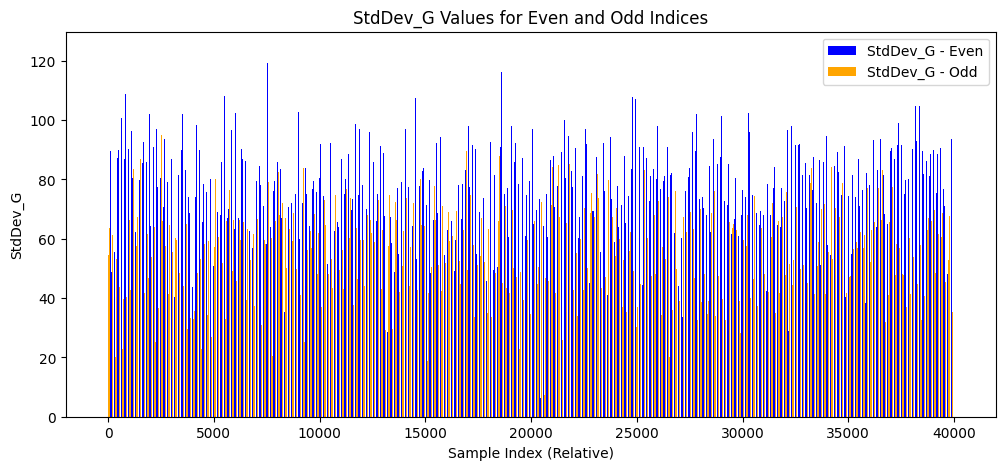

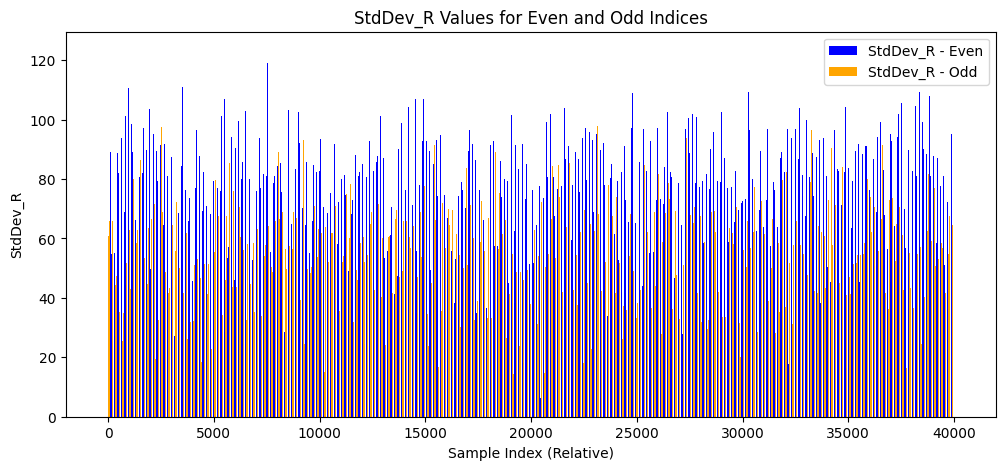

In [20]:

# Select columns for visualization
columns = ['Mean_B', 'Mean_G', 'Mean_R', 'StdDev_B', 'StdDev_G', 'StdDev_R']

# Separate even and odd indices
even_indices = df.index[df.index % 2 == 0]
odd_indices = df.index[df.index % 2 != 0]

# Plot separate bar plots for each column
for col in columns:
    plt.figure(figsize=(12, 5))
    bar_width = 0.4

    # Compute bar positions
    bar_even = range(len(even_indices))
    bar_odd = [x + bar_width for x in bar_even]

    # Bar plots for even and odd
    plt.bar(bar_even, df.loc[even_indices, col].values[:len(bar_even)], 
            bar_width, label=f'{col} - Even', color='blue')
    plt.bar(bar_odd, df.loc[odd_indices, col].values[:len(bar_even)], 
            bar_width, label=f'{col} - Odd', color='orange')

    plt.title(f'{col} Values for Even and Odd Indices')
    plt.xlabel('Sample Index (Relative)')
    plt.ylabel(col)
    plt.legend()
    plt.show()


In [32]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops  # Correct based on your version

# Function to compute GLCM features for an image
def compute_glcm_features(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Ensure the image is valid
    if image is None:
        return [None] * 5

    # Normalize image to fit GLCM requirements (grayscale levels 0-255)
    image = (image / 255 * 15).astype(np.uint8)  # Scale to 16 gray levels

    # Compute GLCM with distance=1, angle=0 (can modify as needed)
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=16, symmetric=True, normed=True)

    # Extract texture properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [contrast, dissimilarity, homogeneity, energy, correlation]

# Initialize a list to store the GLCM features
glcm_features = []


# Process each image and extract GLCM features
for index, row in df.iterrows():
    image_path = row['file_name']
    features = compute_glcm_features(image_path)
    glcm_features.append(features)

# Create new columns for GLCM features
glcm_columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']
df_glcm = pd.DataFrame(glcm_features, columns=glcm_columns)

# Concatenate with original DataFrame
df = pd.concat([df, df_glcm], axis=1)

# Save the results to a new CSV
df.to_csv("output_with_glcm_features.csv", index=False)

print("GLCM features added and saved successfully.")


GLCM features added and saved successfully.


- **Contrast:** Measures the intensity contrast between a pixel and its neighbor by comparing their intensity values.
- **Dissimilarity:** Computes the absolute difference in intensity between neighboring pixels, highlighting varying textures.
- **Homogeneity:** Calculates how similar the values of neighboring pixels are, with higher values indicating more uniformity.
- **Energy:** Measures the sum of squared elements in the GLCM, representing the uniformity or regularity of the texture.
- **Correlation:** Assesses the linear dependency between pixel pairs, reflecting how pixel intensities are related across the image.



In [28]:
import skimage
print(skimage.__version__)


0.24.0


In [33]:
df.head()

,Unnamed: 0,file_name,label,PSNR,SSIM,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0,train_data/a6dcb93f596a43249135678dfcfc17ea.jpg,1,7.948439,0.234759,168.845655,186.656980,194.473272,77.567902,67.430139,64.705886,0.741150,0.315158,0.873713,0.319627,0.974866
1,1,train_data/041be3153810433ab146bc97d5af505c.jpg,0,7.948439,0.234759,111.243589,145.096369,153.789785,90.156627,67.360708,69.114854,0.528995,0.343865,0.843703,0.213744,0.984248
2,2,train_data/615df26ce9494e5db2f70e57ce7a3a4f.jpg,1,10.849806,0.672731,175.279973,181.654854,192.846842,70.549474,62.274128,56.683325,0.310061,0.166858,0.929118,0.396508,0.987861
3,3,train_data/8542fe161d9147be8e835e50c0de39cd.jpg,0,10.849806,0.672731,189.784330,196.318415,204.514516,48.250076,42.010944,31.837350,0.192038,0.101873,0.956658,0.608884,0.981677
4,4,train_data/5d81fa12bc3b4cea8c94a6700a477cf2.jpg,1,7.629244,0.128182,154.871198,169.775800,171.675351,82.529896,74.448978,71.998140,4.774844,1.089907,0.690473,0.242327,0.870571


/Users/aarohiverma/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


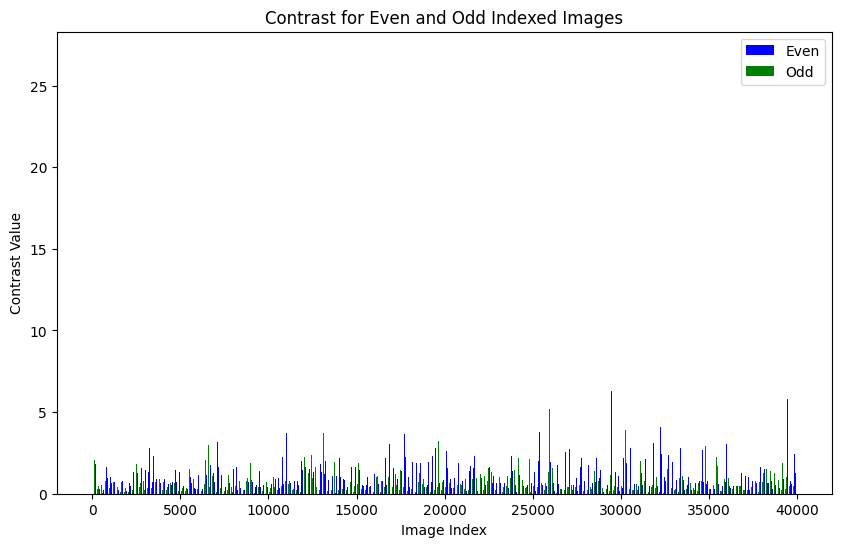

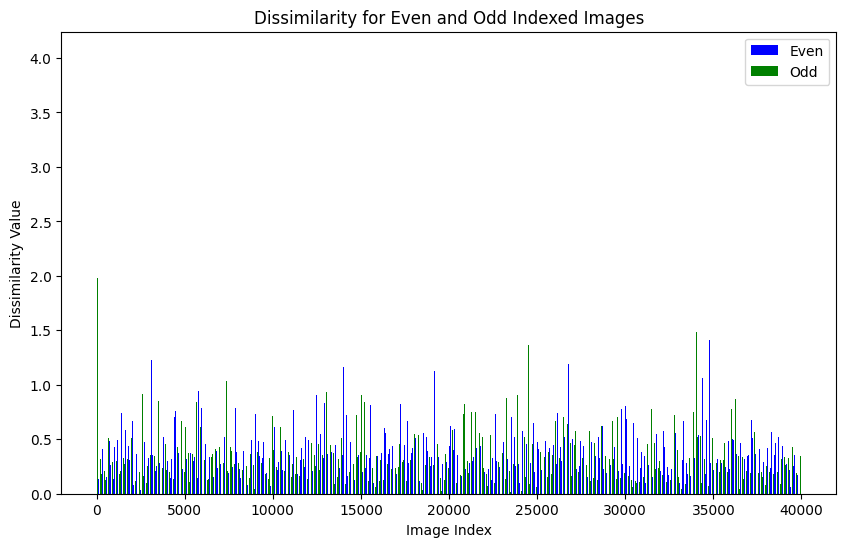

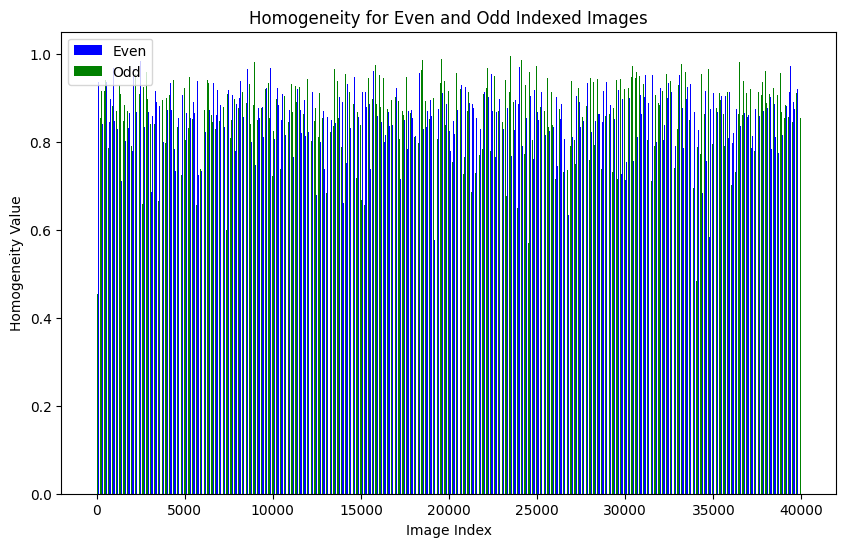

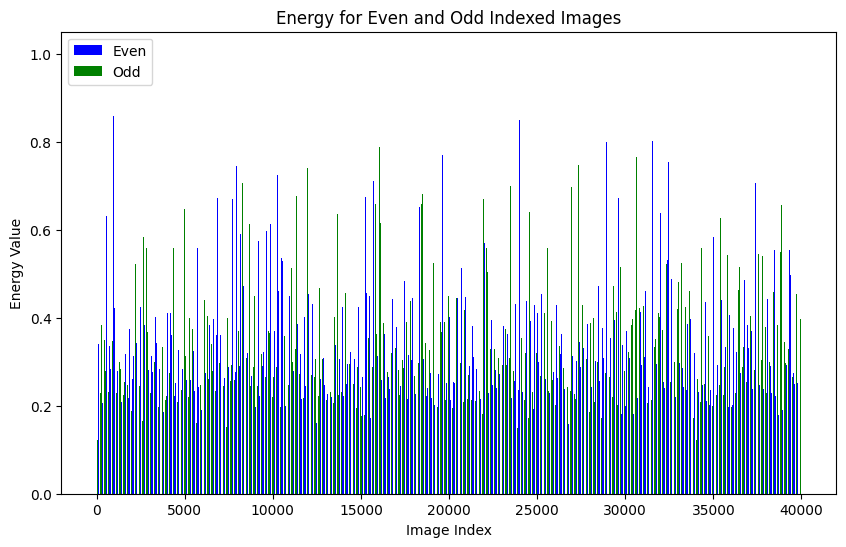

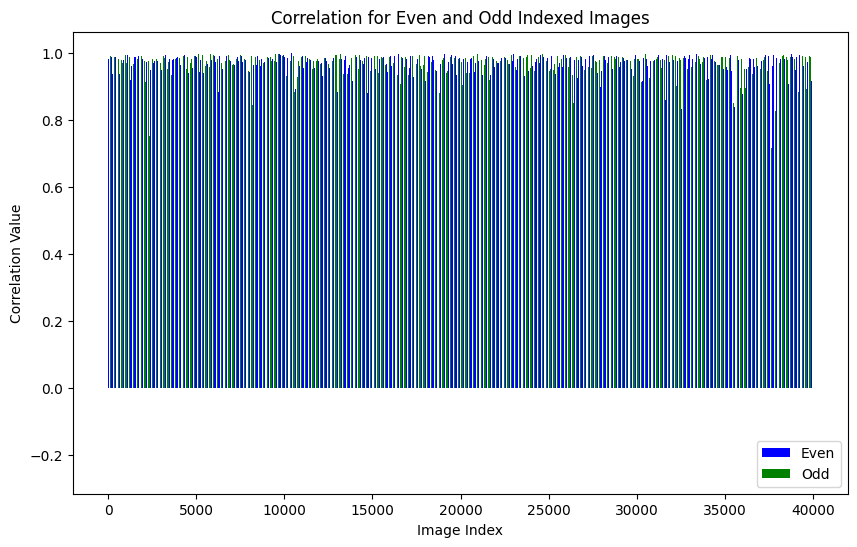

In [34]:
import matplotlib.pyplot as plt

# Create a function to plot the bar charts for even and odd indices
def plot_glcm_features_even_odd(df):
    glcm_columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']

    # Loop through each GLCM feature and create a bar plot for even and odd indexed images
    for col in glcm_columns:
        plt.figure(figsize=(10, 6))

        # Extract even and odd index values for the current column
        even_values = df[col].iloc[::2]  # Even indexed values (starting from index 0)
        odd_values = df[col].iloc[1::2]  # Odd indexed values (starting from index 1)

        # Plot the bar chart for even and odd indexed values
        bar_width = 0.35
        index = range(len(even_values))

        plt.bar(index, even_values, bar_width, label='Even', color='b')
        plt.bar([i + bar_width for i in index], odd_values, bar_width, label='Odd', color='g')

        plt.xlabel('Image Index')
        plt.ylabel(f'{col} Value')
        plt.title(f'{col} for Even and Odd Indexed Images')
        plt.legend()

        # Show the plot
        plt.show()

# Assuming df is your DataFrame with GLCM features
plot_glcm_features_even_odd(df)


<BarContainer object of 39975 artists>

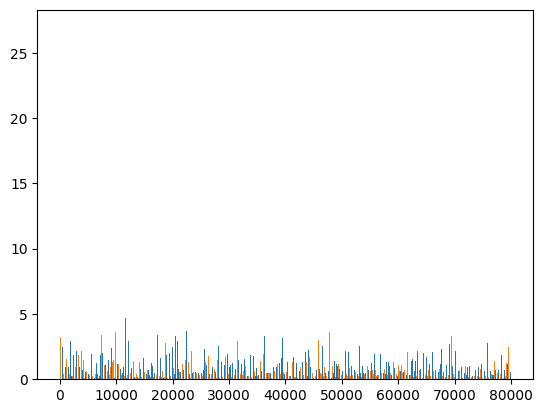

In [35]:
even_indices = df.index[df.index % 2 == 0]
odd_indices = df.index[df.index % 2 == 1]

# Plot bar graphs for the entire range
plt.bar(even_indices, df.loc[even_indices, 'Contrast'], label='Even Index Contrast')
plt.bar(odd_indices, df.loc[odd_indices, 'Contrast'], label='Odd Index Contrast')


/var/folders/lf/z_8lk5cs6j1270_bhw1ksnq00000gn/T/ipykernel_37781/762087076.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


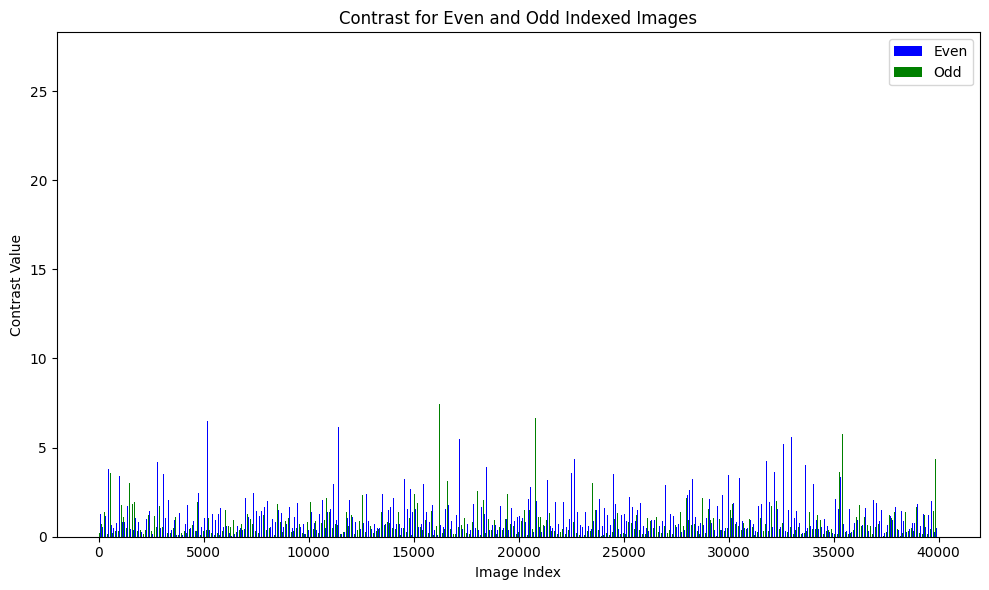

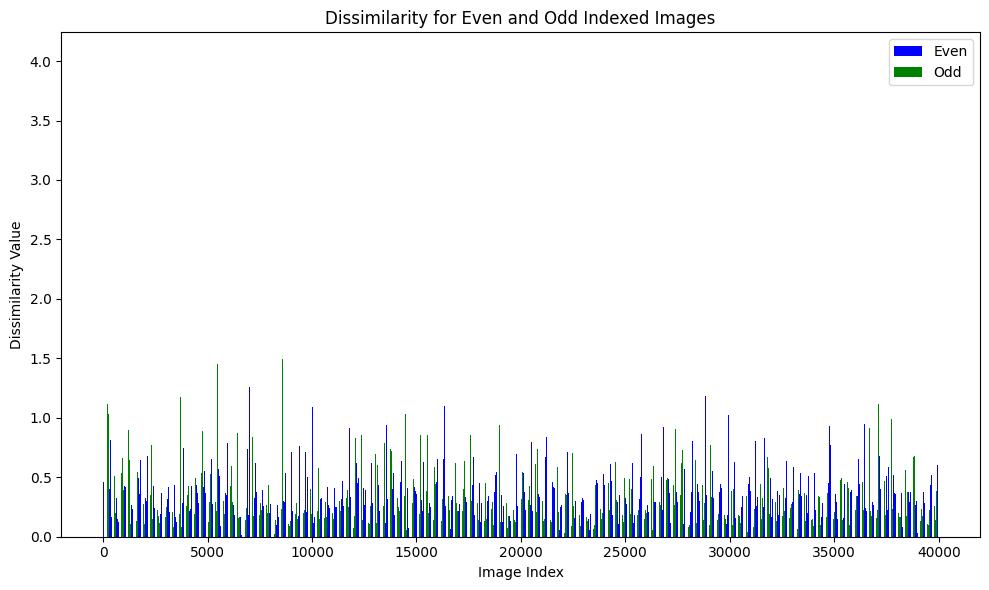

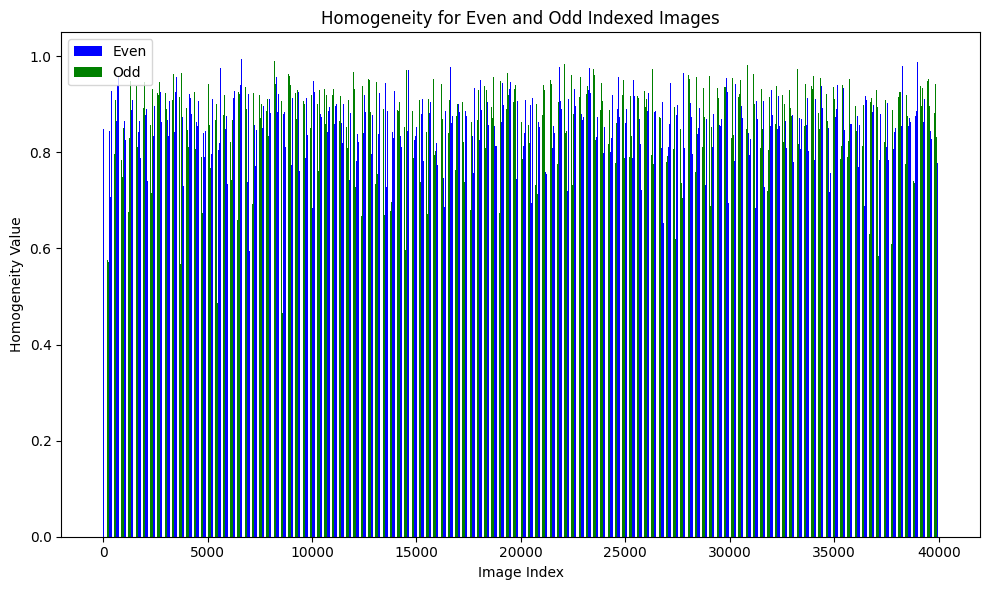

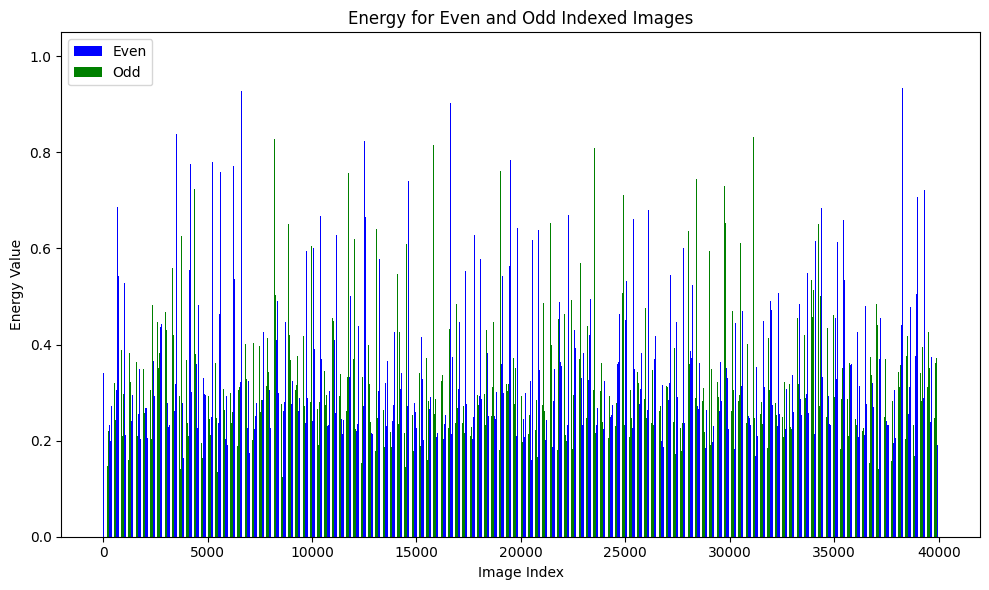

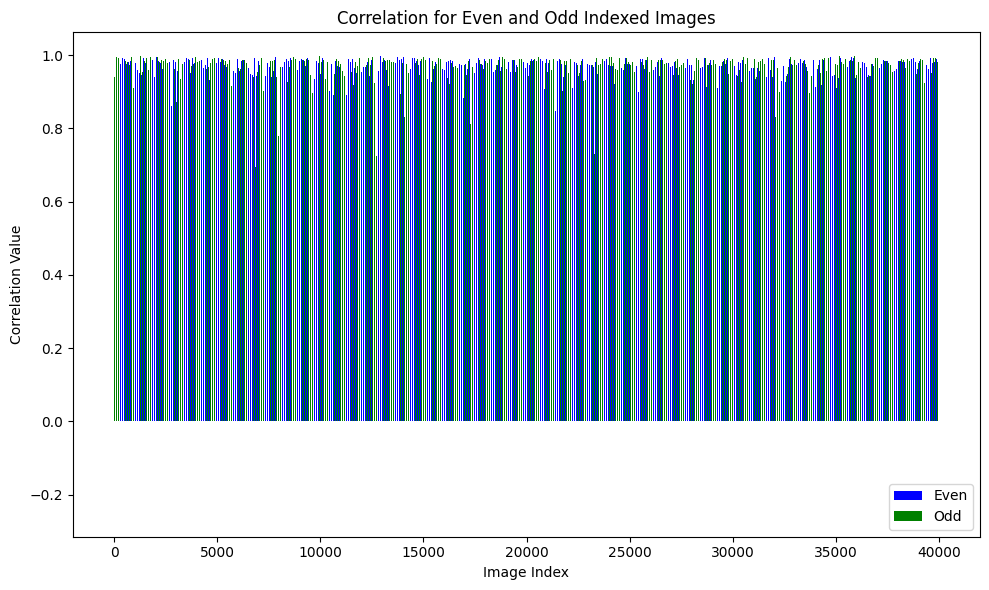

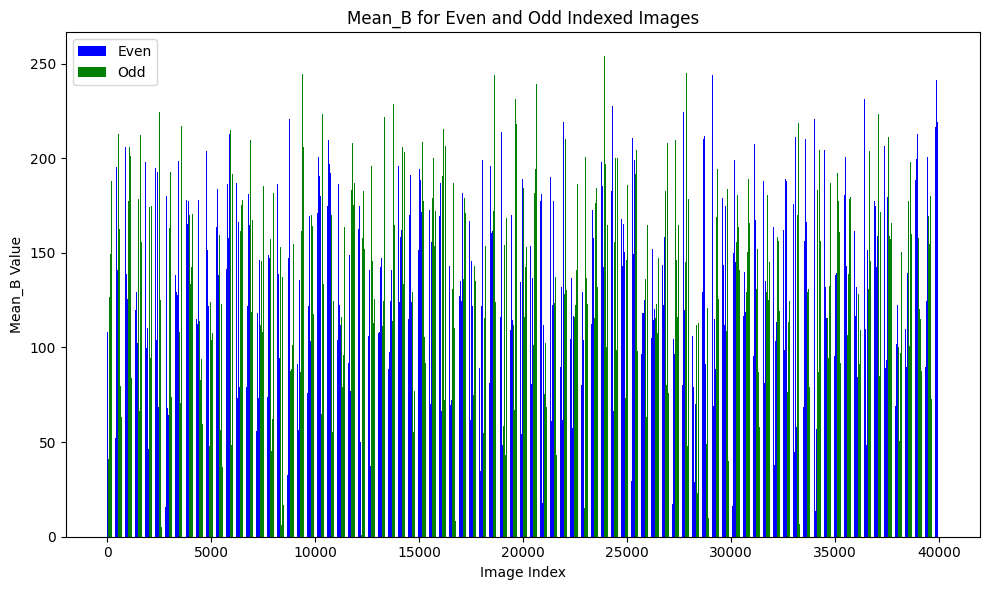

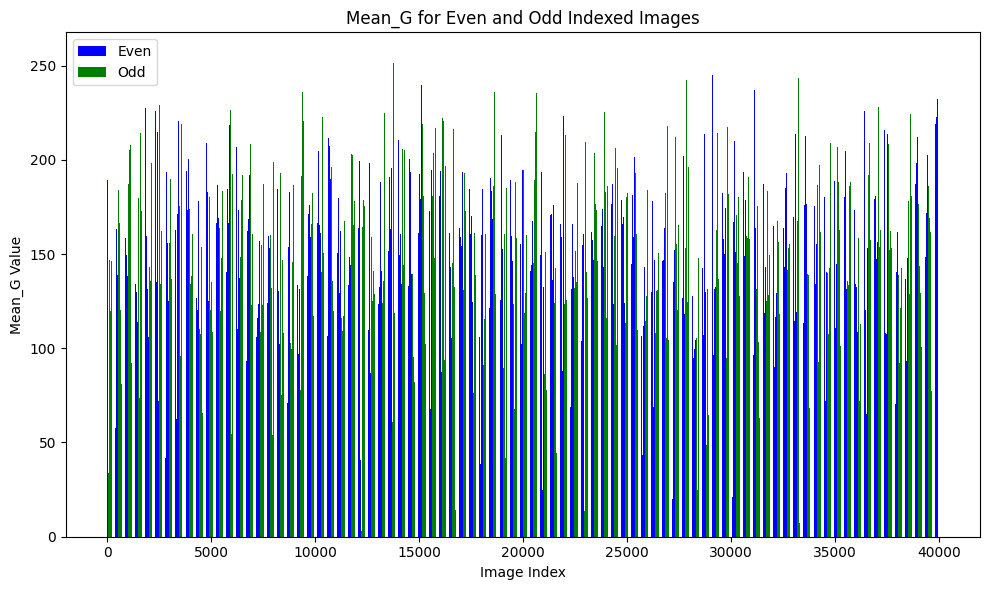

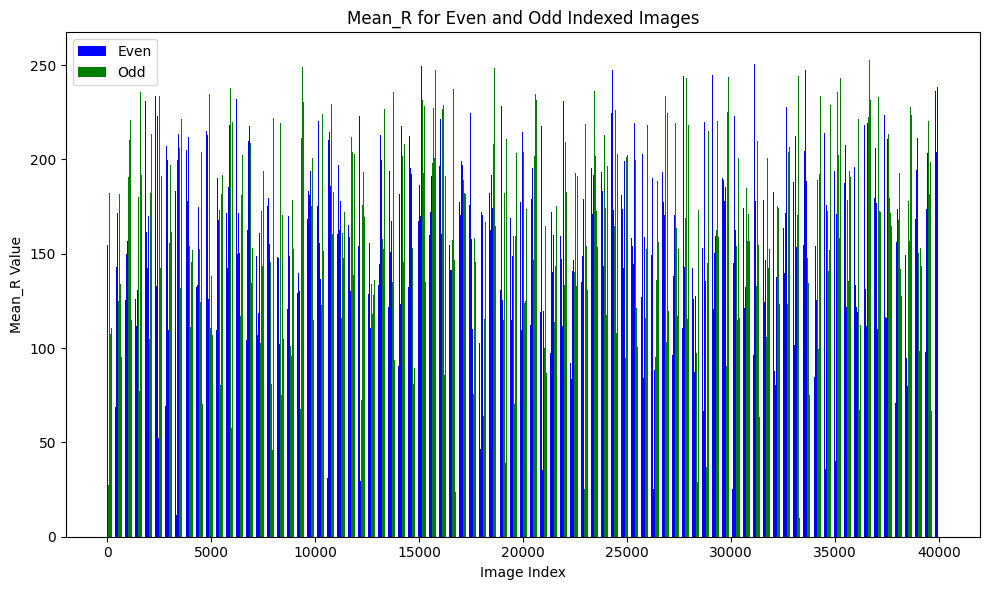

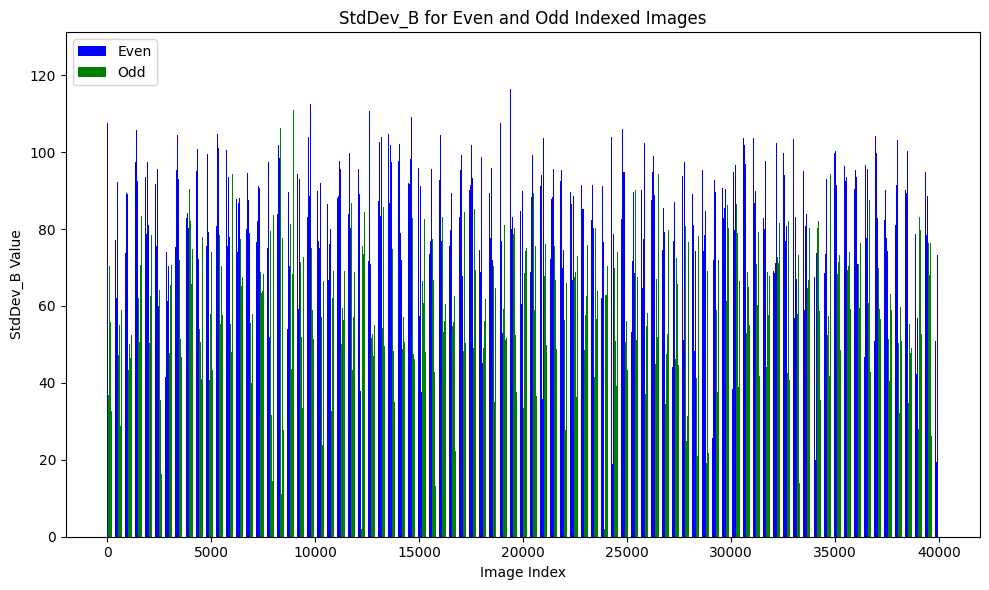

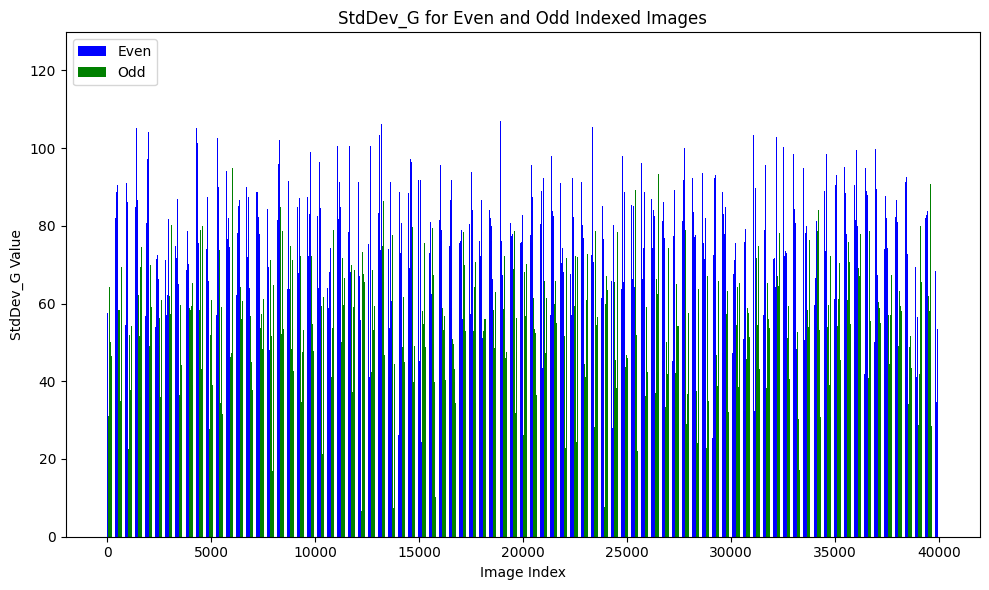

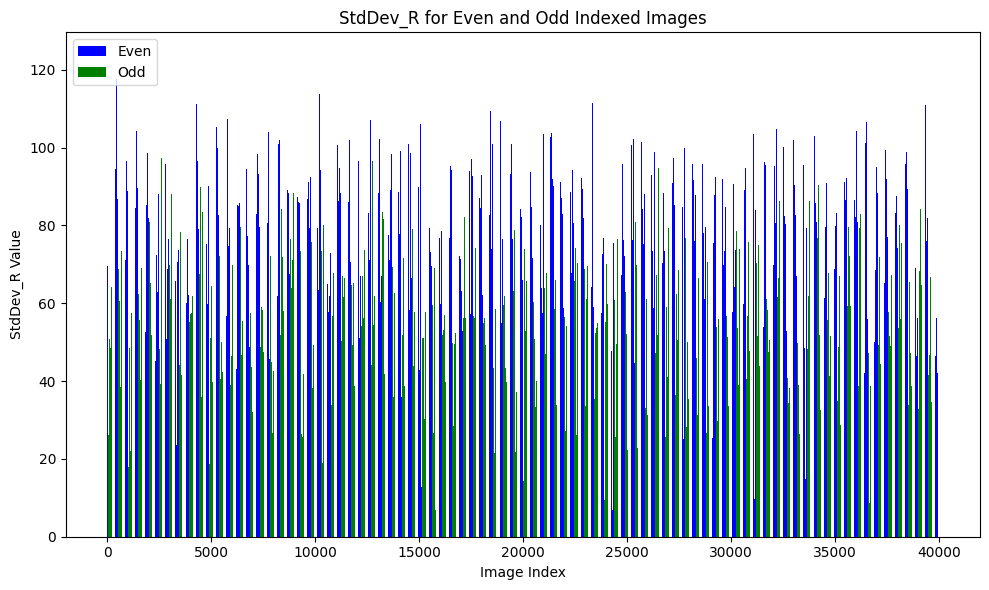

In [37]:
import matplotlib.pyplot as plt

def plot_all_features_even_odd(df):
    feature_columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 
                        'Mean_B', 'Mean_G', 'Mean_R', 'StdDev_B', 'StdDev_G', 'StdDev_R']

    # Loop through each feature and create a bar plot for even and odd indexed images
    for col in feature_columns:
        plt.figure(figsize=(10, 6))

        # Extract even and odd index values for the current column
        even_values = df[col].iloc[::2]  # Even indexed values (starting from index 0)
        odd_values = df[col].iloc[1::2]  # Odd indexed values (starting from index 1)

        # Plot the bar chart for even and odd indexed values
        bar_width = 0.35
        index = range(len(even_values))

        plt.bar(index, even_values, bar_width, label='Even', color='b')
        plt.bar([i + bar_width for i in index], odd_values, bar_width, label='Odd', color='g')

        plt.xlabel('Image Index')
        plt.ylabel(f'{col} Value')
        plt.title(f'{col} for Even and Odd Indexed Images')
        plt.legend()
        
        plt.tight_layout()
        plt.show()

# Call the plotting function
plot_all_features_even_odd(df)


In [43]:
import pandas as pd

def compute_statistics(df):
    feature_columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation', 
                        'Mean_B', 'Mean_G', 'Mean_R', 'StdDev_B', 'StdDev_G', 'StdDev_R']

    stats = []

    for col in feature_columns:
        even_values = df[col].iloc[::2].dropna()  # Even indexed values, ignoring NaNs
        odd_values = df[col].iloc[1::2].dropna()  # Odd indexed values, ignoring NaNs

        stats.append({
            'Feature': col,
            'Even Mean': even_values.mean() if not even_values.empty else None,
            'Odd Mean': odd_values.mean() if not odd_values.empty else None,
            'Even Median': even_values.median() if not even_values.empty else None,
            'Odd Median': odd_values.median() if not odd_values.empty else None,
            'Even Std Dev': even_values.std() if not even_values.empty else None,
            'Odd Std Dev': odd_values.std() if not odd_values.empty else None,
        })

    # Convert to DataFrame for better readability
    stats_df = pd.DataFrame(stats)
    print(stats_df)
    stats_df.to_csv('glcm_color_statistics.csv', index=False)

# Assuming 'df' is your DataFrame
compute_statistics(df)


          Feature   Even Mean    Odd Mean  Even Median  Odd Median  \
0        Contrast    1.183888    0.678319     0.887353    0.430217   
1   Dissimilarity    0.396429    0.326145     0.349256    0.248643   
2     Homogeneity    0.857151    0.866168     0.866901    0.892149   
3          Energy    0.352797    0.340649     0.308314    0.298895   
4     Correlation    0.967853    0.964480     0.976051    0.978804   
5          Mean_B  133.904841  136.061878   136.055617  137.466743   
6          Mean_G  154.419127  147.628319   156.721370  148.468516   
7          Mean_R  161.332810  156.803924   163.415665  158.676729   
8        StdDev_B   83.640521   60.987879    86.833395   61.459928   
9        StdDev_G   78.610501   56.855797    80.320984   57.094839   
10       StdDev_R   80.066154   56.744617    82.815346   57.437908   

    Even Std Dev  Odd Std Dev  
0       1.017201     0.761687  
1       0.226369     0.256240  
2       0.067236     0.092131  
3       0.147175     0.144623  

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('/Users/aarohiverma/Documents/ai_vs_real/train_data.csv')
df_train.head()

,Unnamed: 0,file_name,label,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,0,train_data/3c5ebd82c0a34d588720c5702d692fdf.jpg,0,171.031896,193.532406,188.868077,66.413809,45.104532,50.717281,0.995263,0.468981,0.811692,0.323503,0.937450
1,1,train_data/1723481dec3c4afeae070c46437572e2.jpg,0,206.768733,220.707050,233.478266,70.403014,37.887017,17.014047,0.069692,0.056081,0.973296,0.563830,0.991078
2,2,train_data/71ad1658393d41a48abfb9eb889518b5.jpg,1,23.574631,45.801590,73.229085,36.111833,49.476869,59.886167,0.710660,0.254912,0.905546,0.352740,0.958489
3,3,train_data/cb4b1dacf0da49bfa2b8c8dc9a7b6a41.jpg,0,114.860102,107.542720,109.254069,43.652807,39.104296,39.663745,0.331784,0.255055,0.879407,0.353939,0.968387
4,4,train_data/c5dd6170336d432e9c09ce02a7dd5026.jpg,1,55.867251,99.037814,111.251183,51.054934,73.873736,82.709755,0.884065,0.510970,0.779299,0.187891,0.972886


In [3]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)


In [4]:
df_train.head()

,file_name,label,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,train_data/3c5ebd82c0a34d588720c5702d692fdf.jpg,0,171.031896,193.532406,188.868077,66.413809,45.104532,50.717281,0.995263,0.468981,0.811692,0.323503,0.937450
1,train_data/1723481dec3c4afeae070c46437572e2.jpg,0,206.768733,220.707050,233.478266,70.403014,37.887017,17.014047,0.069692,0.056081,0.973296,0.563830,0.991078
2,train_data/71ad1658393d41a48abfb9eb889518b5.jpg,1,23.574631,45.801590,73.229085,36.111833,49.476869,59.886167,0.710660,0.254912,0.905546,0.352740,0.958489
3,train_data/cb4b1dacf0da49bfa2b8c8dc9a7b6a41.jpg,0,114.860102,107.542720,109.254069,43.652807,39.104296,39.663745,0.331784,0.255055,0.879407,0.353939,0.968387
4,train_data/c5dd6170336d432e9c09ce02a7dd5026.jpg,1,55.867251,99.037814,111.251183,51.054934,73.873736,82.709755,0.884065,0.510970,0.779299,0.187891,0.972886


In [5]:
df_train = df_train.sample(frac=1).reset_index(drop=True)


In [8]:
df_train.shape

(23985, 13)

In [7]:
df_train = df_train.sample(frac=0.3).reset_index(drop=True)


In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.applications import EfficientNetV2B3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate
from tensorflow.keras.models import Model

# ------ Constants ------
IMG_SIZE = 224
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

# ------ Extract columns from df_train ------
file_paths = df_train["file_name"].values  # Image paths
labels = df_train["label"].values.astype(np.float32)  # Convert labels to float32
tabular_features = df_train.drop(columns=["file_name", "label"]).values.astype(np.float32)  # Tabular features
tabular_data_tensor = tf.convert_to_tensor(tabular_features, dtype=tf.float32)

# ------ Fast Image Preprocessing Function ------
def load_image(file_path):
    """Loads an image using TensorFlow's built-in ops (faster than OpenCV)."""
    img = tf.io.read_file(file_path)  # Read image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode JPEG
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Resize & Normalize
    return img

# ------ TensorFlow Dataset Parsing Function ------
def parse_function(file_path, label, tabular_data):
    img = load_image(file_path)  # Load and preprocess image
    return (img, tabular_data), label  # Return (image, tabular) as input tuple

# ------ Create TensorFlow Dataset ------
dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels, tabular_data_tensor))

# 🚀 Speed Boost: Use `interleave()` for parallel loading
dataset = dataset.interleave(
    lambda x, y, z: tf.data.Dataset.from_tensors((x, y, z)),
    cycle_length=8,  # Load 8 images in parallel
    num_parallel_calls=AUTOTUNE
)

dataset = dataset.map(parse_function, num_parallel_calls=AUTOTUNE)
dataset = dataset.shuffle(5000).batch(BATCH_SIZE).cache().prefetch(AUTOTUNE)

# ------ Train & Validation Split ------
train_size = int(0.8 * len(df_train)) // BATCH_SIZE  # Ensure batch-wise split
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# ------ Define Multi-Input Model ------
# 🔹 CNN for Image Features
image_input = Input(shape=(IMG_SIZE, IMG_SIZE, 3), name="image_input")
base_model = EfficientNetV2B3(weights="imagenet", include_top=False)(image_input)
image_features = GlobalAveragePooling2D()(base_model)

# 🔹 MLP for Tabular Data
tabular_input = Input(shape=(tabular_features.shape[1],), name="tabular_input")
tabular_features_processed = Dense(128, activation="relu")(tabular_input)
tabular_features_processed = Dense(64, activation="relu")(tabular_features_processed)

# 🔹 Fusion Layer (Combining Image & Tabular Features)
merged = Concatenate()([image_features, tabular_features_processed])
merged = Dense(128, activation="relu")(merged)
output = Dense(1, activation="sigmoid")(merged)  # Binary classification

# 🔹 Define Model
model = Model(inputs=[image_input, tabular_input], outputs=output)

# 🔹 Compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# 🔹 Train Model
model.fit(train_dataset, validation_data=val_dataset, epochs=5)


Epoch 1/5


/Users/aarohiverma/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['image_input', 'tabular_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


    598/Unknown 1073s 2s/step - accuracy: 0.8492 - loss: 0.4244

2025-02-12 23:02:20.876327: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


    599/Unknown 1074s 2s/step - accuracy: 0.8493 - loss: 0.4242

2025-02-12 23:02:22.825413: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/homebrew/Cellar/python@3.9/3.9.20/Frameworks/Python.framework/Versions/3.9/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


599/599 ━━━━━━━━━━━━━━━━━━━━ 1133s 2s/step - accuracy: 0.8494 - loss: 0.4240 - val_accuracy: 0.5013 - val_loss: 1.2247
Epoch 2/5


2025-02-12 23:03:21.115839: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


599/599 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9362 - loss: 0.1569

2025-02-12 23:21:36.340721: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


599/599 ━━━━━━━━━━━━━━━━━━━━ 1095s 2s/step - accuracy: 0.9362 - loss: 0.1569 - val_accuracy: 0.5248 - val_loss: 1.0126
Epoch 3/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 1091s 2s/step - accuracy: 0.9684 - loss: 0.0833 - val_accuracy: 0.7312 - val_loss: 0.7181
Epoch 4/5
599/599 ━━━━━━━━━━━━━━━━━━━━ 1085s 2s/step - accuracy: 0.9867 - loss: 0.0375 - val_accuracy: 0.5013 - val_loss: 8.8602
Epoch 5/5


2025-02-12 23:57:52.672002: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


599/599 ━━━━━━━━━━━━━━━━━━━━ 1086s 2s/step - accuracy: 0.9873 - loss: 0.0354 - val_accuracy: 0.7332 - val_loss: 0.5302


In [10]:
model.save("multi_input_model.h5")  # Saves as an HDF5 file


In [11]:
import pandas as pd

In [13]:
df_test = pd.read_csv('test.csv')

In [14]:
df_test.head()

,id
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg


In [17]:
import cv2
import numpy as np


# Function to calculate mean and standard deviation for color images (BGR channels)
def calculate_mean_std_color(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the mean and standard deviation for each channel (Blue, Green, Red)
    mean, std_dev = cv2.meanStdDev(image)

    # Return the values for each channel
    return mean.flatten(), std_dev.flatten()

# Initialize lists to store results
mean_values = []
std_dev_values = []

# Loop through each image file in the dataframe
for index, row in df_test.iterrows():
    image_path = row['id']  # Get the image file path
    mean, std_dev = calculate_mean_std_color(image_path)  # Calculate mean and std

    # Append the values to the lists
    mean_values.append(mean)
    std_dev_values.append(std_dev)

# Add the results as new columns to your dataframe
df_test[['Mean_B', 'Mean_G', 'Mean_R']] = pd.DataFrame(mean_values)
df_test[['StdDev_B', 'StdDev_G', 'StdDev_R']] = pd.DataFrame(std_dev_values)

# Save the updated dataframe with the mean and std values to a new CSV


# Example of viewing the result
df_test.head()


,id,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg,93.827995,139.799667,141.812574,66.411804,63.292838,76.193827
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg,55.051154,66.117082,85.290761,60.792807,68.627271,77.797043
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg,171.233147,171.233147,171.233147,46.955163,46.955163,46.955163
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg,117.593816,137.974868,135.912936,65.250722,57.703197,63.568026
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg,162.191591,180.409978,200.949544,88.567894,77.400920,65.158145


In [18]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import graycomatrix, graycoprops  # Correct based on your version

# Function to compute GLCM features for an image
def compute_glcm_features(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Ensure the image is valid
    if image is None:
        return [None] * 5

    # Normalize image to fit GLCM requirements (grayscale levels 0-255)
    image = (image / 255 * 15).astype(np.uint8)  # Scale to 16 gray levels

    # Compute GLCM with distance=1, angle=0 (can modify as needed)
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=16, symmetric=True, normed=True)

    # Extract texture properties
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    return [contrast, dissimilarity, homogeneity, energy, correlation]

# Initialize a list to store the GLCM features
glcm_features = []


# Process each image and extract GLCM features
for index, row in df_test.iterrows():
    image_path = row['id']
    features = compute_glcm_features(image_path)
    glcm_features.append(features)

# Create new columns for GLCM features
glcm_columns = ['Contrast', 'Dissimilarity', 'Homogeneity', 'Energy', 'Correlation']
df_glcm = pd.DataFrame(glcm_features, columns=glcm_columns)

# Concatenate with original DataFrame
df_test = pd.concat([df_test, df_glcm], axis=1)

# Save the results to a new CSV


print("GLCM features added and saved successfully.")


GLCM features added and saved successfully.


In [19]:
df_test.head()

,id,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R,Contrast,Dissimilarity,Homogeneity,Energy,Correlation
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg,93.827995,139.799667,141.812574,66.411804,63.292838,76.193827,0.569411,0.237202,0.906969,0.229963,0.980197
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg,55.051154,66.117082,85.290761,60.792807,68.627271,77.797043,1.163743,0.541490,0.782350,0.372104,0.964919
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg,171.233147,171.233147,171.233147,46.955163,46.955163,46.955163,0.100066,0.086178,0.958126,0.324979,0.993496
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg,117.593816,137.974868,135.912936,65.250722,57.703197,63.568026,1.112489,0.674759,0.704810,0.164296,0.952797
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg,162.191591,180.409978,200.949544,88.567894,77.400920,65.158145,0.211848,0.163787,0.922640,0.433236,0.994807


In [21]:
from tensorflow.keras.models import load_model

model = load_model("/Users/aarohiverma/Documents/ai_vs_real/multi_input_model.h5")


In [22]:
# Extract file paths from df_test
test_file_paths = df_test["id"].values  # Image paths

# Extract tabular features (excluding file_name)
tabular_test_features = df_test.drop(columns=["id"]).values.astype(np.float32)

# Convert tabular features into Tensor
tabular_test_tensor = tf.convert_to_tensor(tabular_test_features, dtype=tf.float32)


In [23]:
def load_image(file_path):
    """Load and preprocess image for prediction."""
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0  # Resize & Normalize
    return img


In [24]:
# Load and preprocess all images
image_test_tensor = tf.stack([load_image(fp) for fp in test_file_paths])


In [25]:
predictions = model.predict([image_test_tensor, tabular_test_tensor])

predicted_classes = (predictions > 0.5).astype(int)

df_test["Predictions"] = predicted_classes


/Users/aarohiverma/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['image_input', 'tabular_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 58s 329ms/step


In [26]:
df_test.head()

,id,Mean_B,Mean_G,Mean_R,StdDev_B,StdDev_G,StdDev_R,Contrast,Dissimilarity,Homogeneity,Energy,Correlation,Predictions
0,test_data_v2/1a2d9fd3e21b4266aea1f66b30aed157.jpg,93.827995,139.799667,141.812574,66.411804,63.292838,76.193827,0.569411,0.237202,0.906969,0.229963,0.980197,0
1,test_data_v2/ab5df8f441fe4fbf9dc9c6baae699dc7.jpg,55.051154,66.117082,85.290761,60.792807,68.627271,77.797043,1.163743,0.541490,0.782350,0.372104,0.964919,1
2,test_data_v2/eb364dd2dfe34feda0e52466b7ce7956.jpg,171.233147,171.233147,171.233147,46.955163,46.955163,46.955163,0.100066,0.086178,0.958126,0.324979,0.993496,0
3,test_data_v2/f76c2580e9644d85a741a42c6f6b39c0.jpg,117.593816,137.974868,135.912936,65.250722,57.703197,63.568026,1.112489,0.674759,0.704810,0.164296,0.952797,0
4,test_data_v2/a16495c578b7494683805484ca27cf9f.jpg,162.191591,180.409978,200.949544,88.567894,77.400920,65.158145,0.211848,0.163787,0.922640,0.433236,0.994807,0


In [28]:
df = df_test[["id","Predictions"]]

In [30]:
df.to_csv('pred_1.csv',index= False)